# Question 1

Make a class called LinearRegression which provides two functions : fit and predict. You may use the code present in the repository as template. You need to make the following changes in order to include regularization :
1. To initialize an object of the class, you need to provide 4 parameters : learning_rate, epochs, penalty and alpha (coefficient of the regularization term). Penalty and alpha should have default values of None and 0 respectively.
2. The parameter penalty should take in any one of these inputs : L1 (Lasso), L2 (Ridge) and None (simple LR).
3. Do some basic differentiation to find out the expressions of dC/dw and dC/db when regularization is involved. Use internet whenever necessary.
4. Write if-else statements inside the fit method to cover the different values for dw for different values of penalty.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [3]:
class LinearRegression:
    def __init__(self, learning_rate, epochs, penalty=None, alpha=0):
        self.epochs=epochs
        self.penalty = penalty
        self.alpha = alpha
        
    # fit method - performs gradient descent to optimize weights and bias of linreg model
    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train=y_train.reshape(-1,1)
        # init parameters
        self.weights = np.zeros((n_features,1))
        self.bias = np.zeros((1,1))

        # gradient descent
        for i in range(self.epochs):
            delta= -(y_train-np.dot(X_train,self.weights)-self.bias)/n_samples
            dw= np.dot(X_train.T,delta)
            db= np.sum(delta).reshape(1,1)
            
            # Regularization terms
            if self.penalty == 'L1':
                dw += (self.alpha / n_samples) * np.sign(self.weights)
            elif self.penalty == 'L2':
                dw += (2 * self.alpha / n_samples) * self.weights

            #update weights and biases
            self.weights-= self.lr * dw
            self.bias-= self.lr * db
            

    # predict method - calculates predictions based on learned parameters
    def predict(self, X_test):
        y_predicted = np.dot(X_test,self.weights)+self.bias
        print(self.weights, self.bias)
        return y_predicted

# Question 2
Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the 3 models created in question 1 (**linear regression, lasso and ridge regression**) and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs, penalty and alpha) to achieve losses close to that of the sklearn models. (*We will cover hyperparameter tuning using GridSearchCV and all in later weeks. For now, you may manually run the model for different values of the hyperparameters.*)

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Real estate.csv to Real estate.csv


In [5]:
import pandas as pd
df = pd.read_csv("Real estate.csv")

In [6]:
df.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

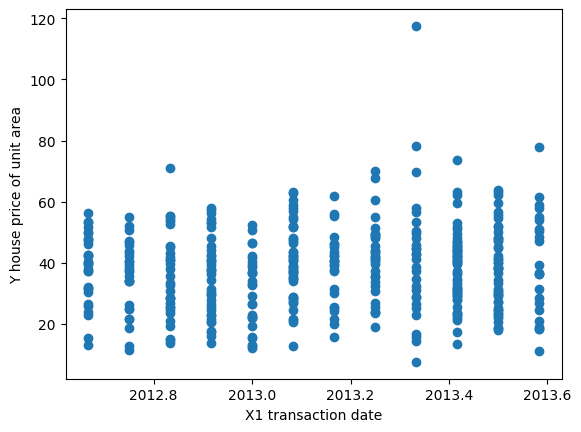

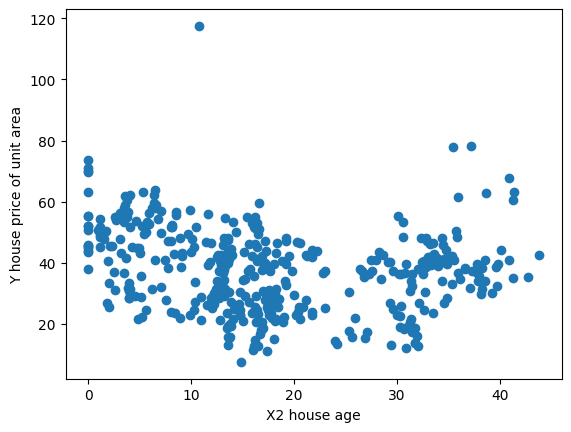

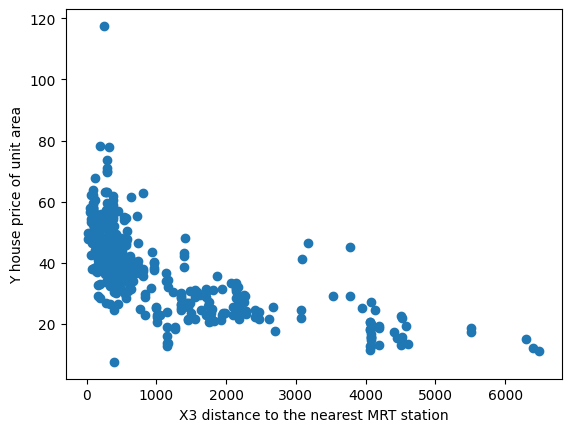

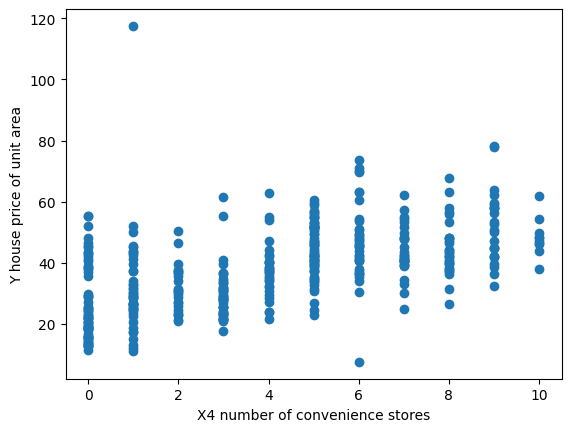

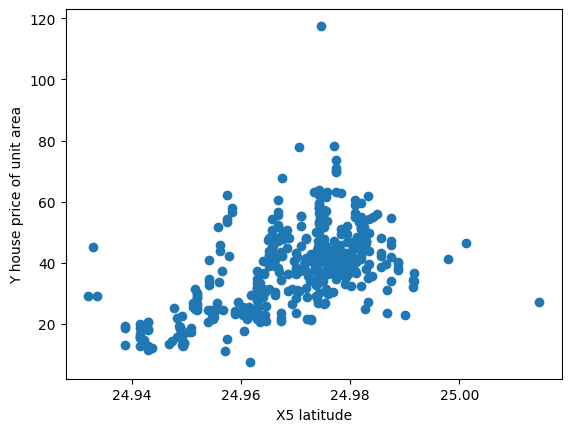

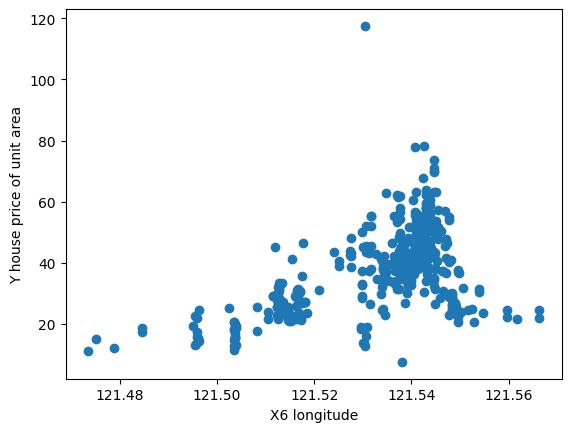

In [7]:
import matplotlib.pyplot as plt

columns = df.columns[1:-1]  # except first and last
target_column = df.columns[-1] # last column

for column in columns:
    plt.scatter(df[column], df[target_column])
    plt.xlabel(column)
    plt.ylabel(target_column)
    plt.show()

In [8]:
unwanted_columns = ['No']
df = df.drop(unwanted_columns, axis=1)

In [9]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# test data size = 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training set shapes:", X_train.shape, y_train.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)

Training set shapes: (310, 6) (310,)
Testing set shapes: (104, 6) (104,)


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#normalise X_train
X_train_normalized = scaler.fit_transform(X_train)

# Normalize X_test
X_test_normalized = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Create instances of models
linear_reg_model = LinearRegression()
lasso_reg_model = Lasso()
ridge_reg_model = Ridge()

# Fit training data to models
linear_reg_model.fit(X_train_normalized, y_train)
lasso_reg_model.fit(X_train_normalized, y_train)
ridge_reg_model.fit(X_train_normalized, y_train)

# Predict on testin data
linear_reg_predictions = linear_reg_model.predict(X_test_normalized)
lasso_reg_predictions = lasso_reg_model.predict(X_test_normalized)
ridge_reg_predictions = ridge_reg_model.predict(X_test_normalized)

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)

lasso_reg_mse = mean_squared_error(y_test, lasso_reg_predictions)
lasso_reg_r2 = r2_score(y_test, lasso_reg_predictions)

ridge_reg_mse = mean_squared_error(y_test, ridge_reg_predictions)
ridge_reg_r2 = r2_score(y_test, ridge_reg_predictions)

print("Linear Regression")
print("MSE:", linear_reg_mse)
print("R2 Score:", linear_reg_r2)
print("\n")
print("Lasso Rgeression")
print("MSE:", lasso_reg_mse)
print("R2 Score:", lasso_reg_r2)
print("\n")
print("Ridge Regression")
print("MSE:", ridge_reg_mse)
print("R2 Score:", ridge_reg_r2)

Linear Regression
MSE: 66.67336271835958
R2 Score: 0.5796624182861772


Lasso Rgeression
MSE: 103.34289251487661
R2 Score: 0.34848191607631085


Ridge Regression
MSE: 65.41303409820154
R2 Score: 0.5876080724839378


##Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Create a train-test-split. Take any suitable test size.

In [13]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


4. Write code for the sigmoid function and Logistic regression.
(Logistic Regression code is available in the Week2/Examples folder. However, try to code it yourself. A template is provided for that.)

*Optional* : Include the regularization terms as you did in the first question. 

In [14]:
def sigmoid(z):
  z = np.clip(z, -500, 500)  # Clip values to avoid overflow
  return 1 / (1 + np.exp(-z))

def sigmoid_derivative(self, z):
  return self.sigmoid(z)*(1-self.sigmoid(z))

class LogisticRegression:
    def __init__(self, learning_rate, epochs, penalty=None, alpha=0):
      #Initialise the hyperparameters of the model
        self.lr = learning_rate
        self.epochs = epochs
        self.penalty = penalty
        self.alpha = alpha

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights=np.random.randn(n_features,1)/np.sqrt(n_features)
        self.bias= np.random.randn(1,1)

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = np.dot(X,self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = -np.dot(X.T,(y - y_pred))/n_samples
            db = -np.sum(y - y_pred)/n_samples

            # Regularization terms
            if self.penalty == 'L1':
                dw += (self.alpha / n_samples) * np.sign(self.weights)
            elif self.penalty == 'L2':
                dw += (2 * self.alpha / n_samples) * self.weights

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        y_pred_class = (y_pred > 0.5).astype(int)
        return y_pred_class

5. Fit your model on the dataset and make predictions.
6. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
7. Print accuracy_score in each case using sklearn.metrics .

In [15]:
# my_model
my_model = LogisticRegression(learning_rate=0.01, epochs=1000)

my_model.fit(X_train, y_train)
my_model_predictions = my_model.predict(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression

# sklearn LogisticRegression
sklearn_model = SklearnLogisticRegression(max_iter=10000)
sklearn_model.fit(X_train, y_train)
sklearn_predictions = sklearn_model.predict(X_test)

In [17]:
# compare my_model and sklearn_model

my_model_accuracy = accuracy_score(my_model_predictions, y_test)
sklearn_accuracy = accuracy_score(sklearn_predictions, y_test)

NameError: ignored

In [ ]:
# Print accuracy scores
print("My Model Accuracy:", my_model_accuracy)
print("Sklearn Model Accuracy:", sklearn_accuracy)

8. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
9. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .
10. **Optional Challenge** : For the best model in each case (yours and scikit-learn), print the roc_auc_score and plot the roc curves using sklearn.metrics and matplotlib.

In [18]:
from sklearn.metrics import classification_report

print("My Model Classification Report:")
print(classification_report(y_test, my_model_predictions))

print("Sklearn Model Classification Report:")
print(classification_report(y_test, sklearn_predictions))

My Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        54
           1       0.96      0.91      0.94        89

    accuracy                           0.92       143
   macro avg       0.91      0.93      0.92       143
weighted avg       0.93      0.92      0.92       143

Sklearn Model Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



In [19]:
from sklearn.metrics import confusion_matrix

print("My Model Confusion Matrix:")
print(confusion_matrix(y_test, my_model_predictions))

print("Sklearn Model Confusion Matrix:")
print(confusion_matrix(y_test, sklearn_predictions))

My Model Confusion Matrix:
[[51  3]
 [ 8 81]]
Sklearn Model Confusion Matrix:
[[51  3]
 [ 2 87]]


#Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset https://www.kaggle.com/datasets/uciml/glass. 

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.

In [20]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass.csv


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split

glass_data = pd.read_csv("glass.csv")

X = glass_data.iloc[:, 1:-1]
y = glass_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

In [39]:
import numpy as np
from collections import Counter

def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2) ** 2))

class KNN(object):
    def __init__(self,k):
        self.k=k

    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train

    def predict(self,x_test):
        predictions=[self._helper(x) for x in x_test]
        return np.array(predictions)
        
    def _helper(self,x):
        prediction=[euclidean_distance(x,x1) for x1 in self.x_train]
        indices= np.argsort(prediction)[:self.k]
        labels= [self.y_train[i] for i in indices]
        c=Counter(labels).most_common()
        return c[0][0]
        
def accuracy(predictions,y_test):
    return np.sum(predictions==y_test)/len(y_test)

In [40]:
X = np.array(X)
y = np.array(y)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [63]:
# Use the Model we defined
clf = KNN(k=-1)  
clf.fit(X_train,y_train)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)

In [64]:
from sklearn.metrics import accuracy_score

for i in range(1,11):
  clf=KNN(k=i)
  clf.fit(X_train,y_train)
  clf_predictions=clf.predict(X_test)
  accuracy=accuracy_score(clf_predictions,y_test)
  print("k=", i, "Accuracy=", accuracy)

k= 1 Accuracy= 0.8372093023255814
k= 2 Accuracy= 0.8372093023255814
k= 3 Accuracy= 0.7441860465116279
k= 4 Accuracy= 0.7906976744186046
k= 5 Accuracy= 0.6744186046511628
k= 6 Accuracy= 0.6744186046511628
k= 7 Accuracy= 0.6744186046511628
k= 8 Accuracy= 0.6976744186046512
k= 9 Accuracy= 0.6744186046511628
k= 10 Accuracy= 0.6511627906976745


In [66]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.8372093023255814


9. Finally use sklearn.tree to implement a Decision Tree Classifier on this dataset. Check for max depth = 5 to 10. Find out its accuracy.
10. Plot the decision tree.

In [67]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

max_depths = range(5, 11)

for depth in max_depths:
  clf=DecisionTreeClassifier(max_depth=depth)
  clf.fit(X_train,y_train)
  predictions=clf.predict(X_test)
  accuracy=accuracy_score(predictions, y_test)
  print("max_depth=", depth, ", Accuracy=", accuracy)
     

max_depth= 5 , Accuracy= 0.7906976744186046
max_depth= 6 , Accuracy= 0.813953488372093
max_depth= 7 , Accuracy= 0.7209302325581395
max_depth= 8 , Accuracy= 0.7906976744186046
max_depth= 9 , Accuracy= 0.7906976744186046
max_depth= 10 , Accuracy= 0.6511627906976745


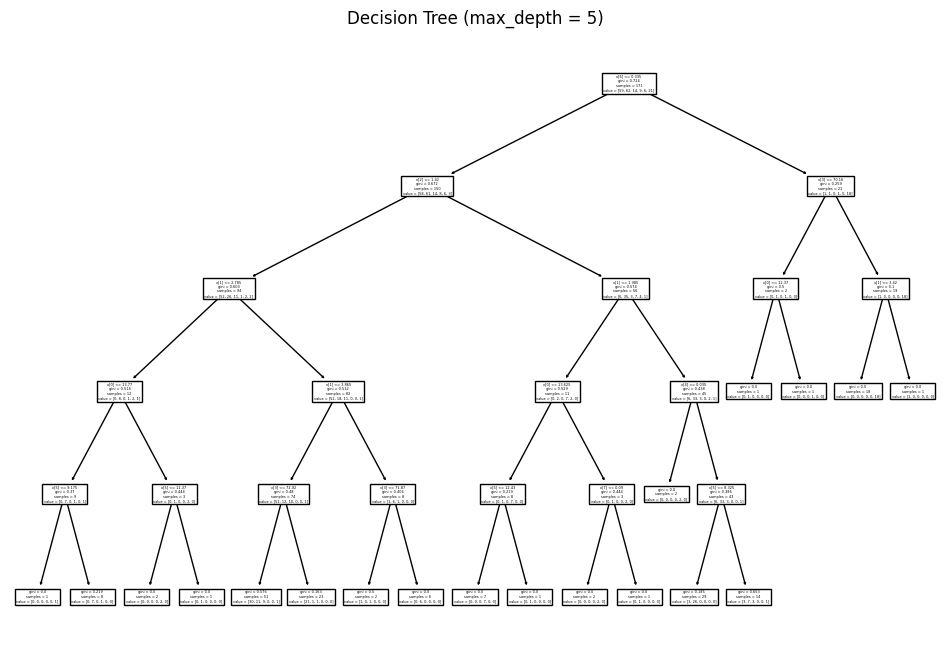

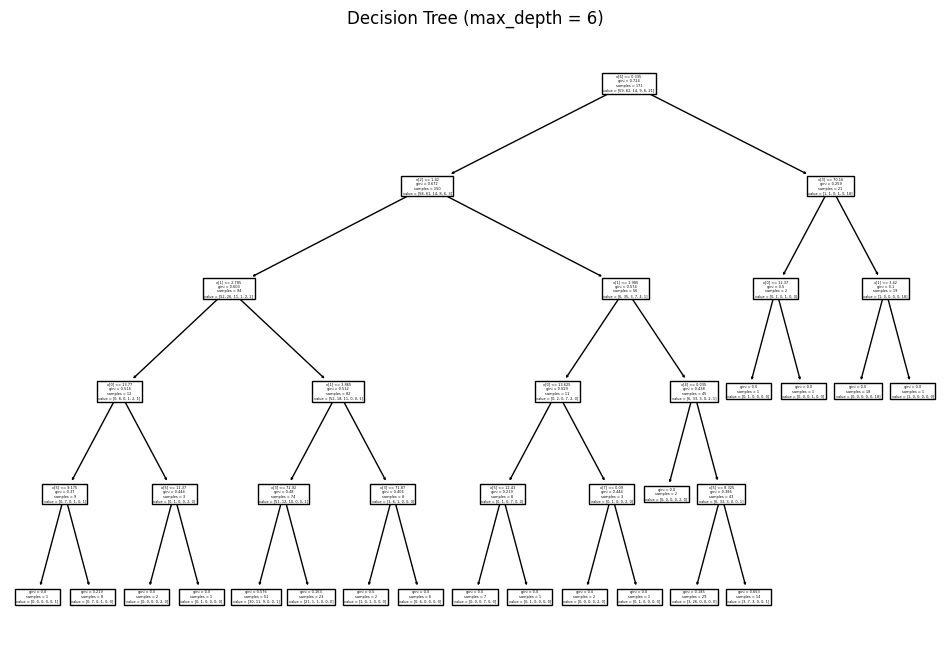

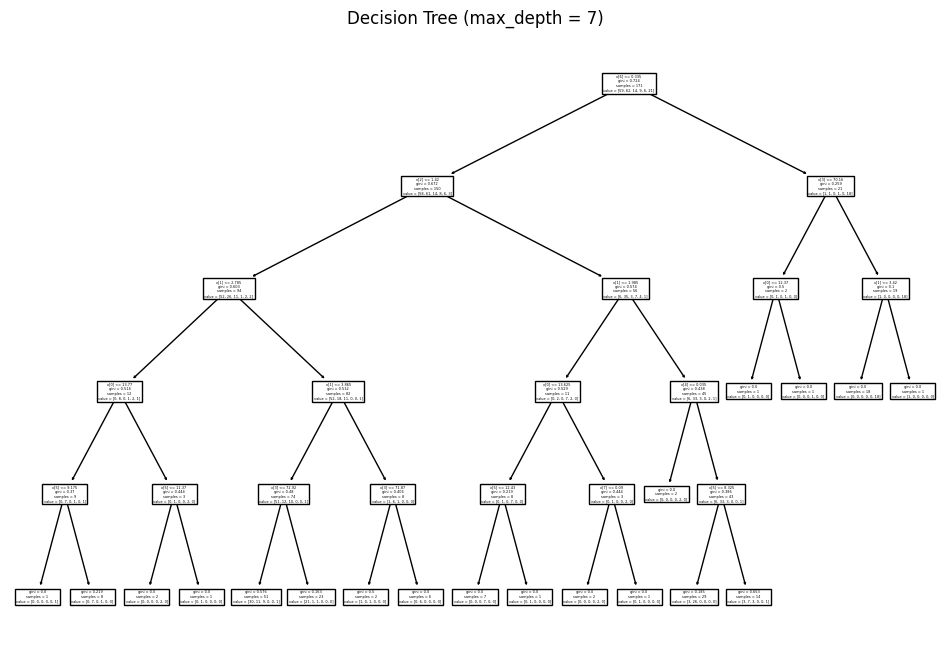

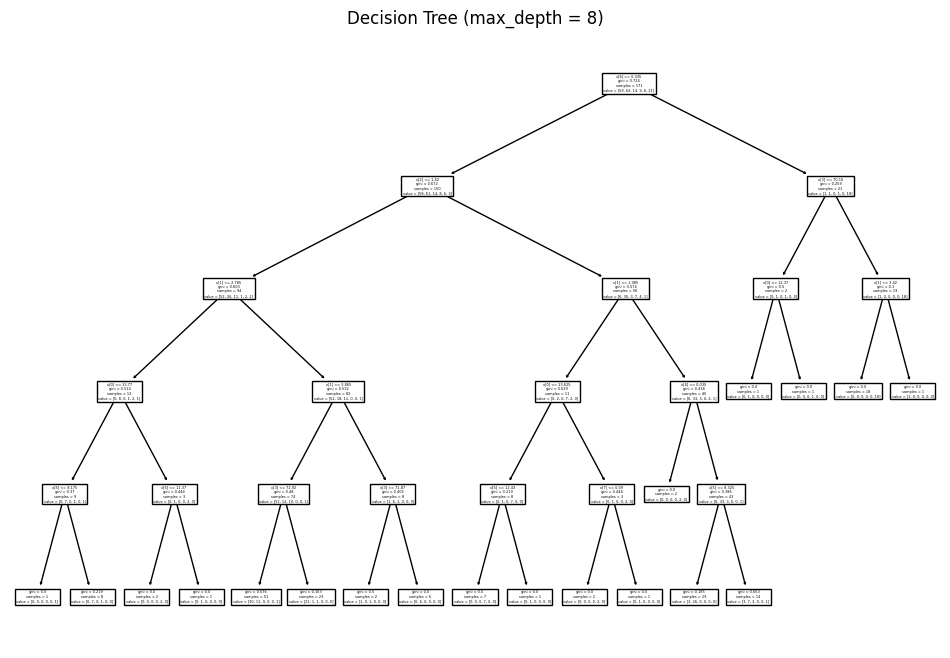

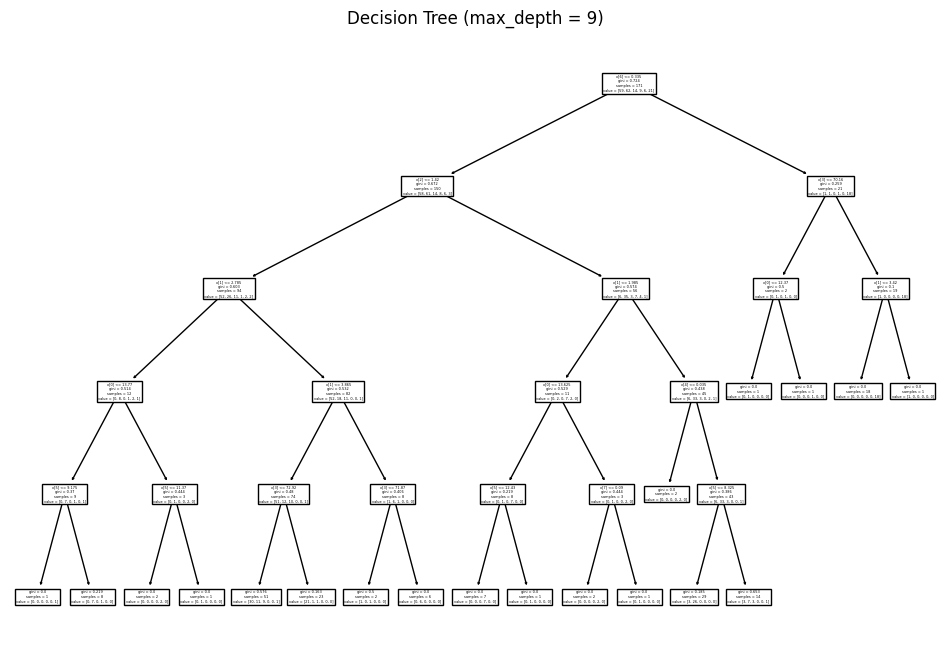

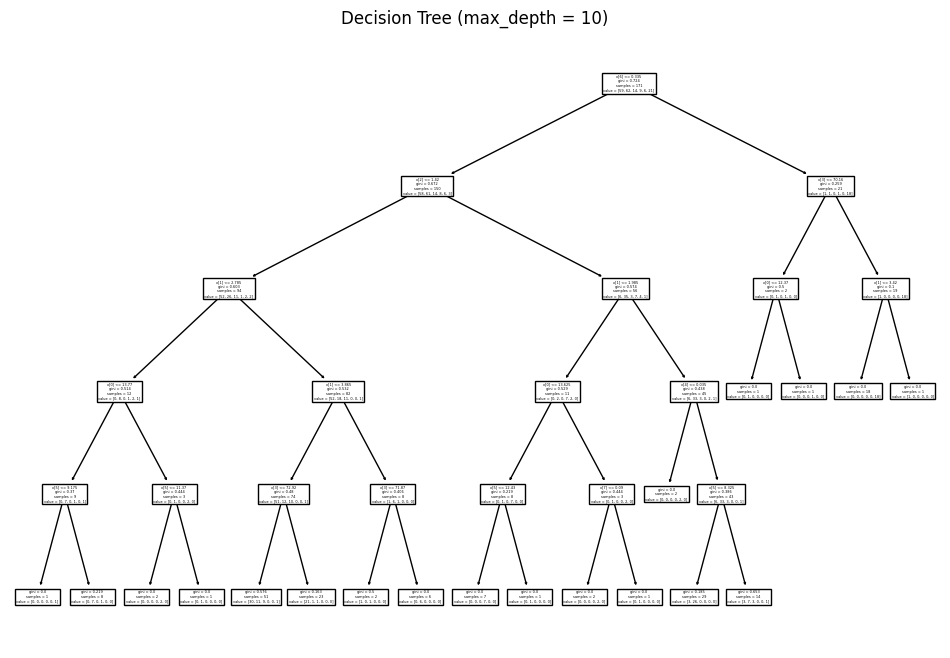

In [71]:
for depth in max_depths:
  plt.figure(figsize=(12,8))
  plot_tree(decision_tree = clf, max_depth=depth)
  plt.title("Decision Tree (max_depth = {})".format(depth))
  plt.show()